## Inspired by Kate Strachnyi's post on how her connections grew over last few years -
#### https://www.linkedin.com/feed/update/urn:li:activity:6384807557596221440/
#### I also created a wordcloud of where my connections work and what they do[from their "Position"]

<b> P.S. - visit Kate also posted link to download your data, it is here - https://www.linkedin.com/help/linkedin/answer/66844/exporting-connections-from-linkedin?lang=en&lipi=urn%3Ali%3Apage%3Ad_flagship3_detail_base%3Btqxg0aYZRzqtGofno%2BV34w%3D%3D </b>

In [106]:
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Set sns for better plots
sns.set()

### Reading Data

In [91]:
df = pd.read_csv("D://pgdds//LinkedInDataExport/Connections.csv")

In [92]:
df['connect_date'] = df["Connected On"].str.split(",").apply(lambda s: "20"+s[0].split("/")[-1])

### matplotlib magic command

In [94]:
%matplotlib inline

### Creating metric for line plot

In [95]:
grp_data = df[df["connect_date"] != "2018"].groupby("connect_date")

## Plot A -- Connections over year

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  """Entry point for launching an IPython kernel.


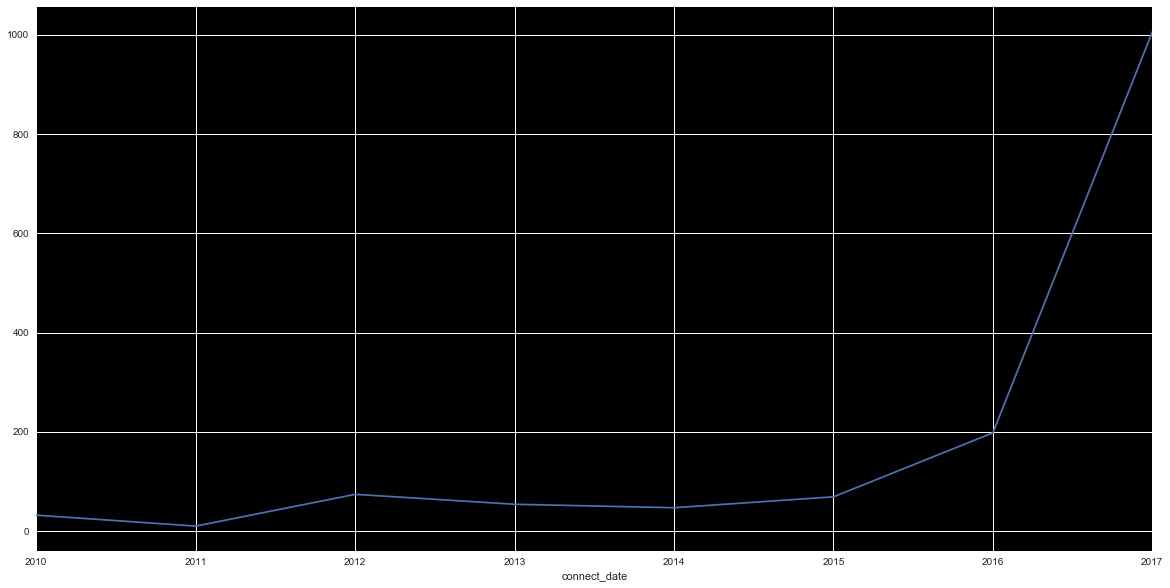

In [96]:
grp_data.count()["Connected On"].plot(figsize=(20,10)).set_axis_bgcolor('black')

### Preprocessing for StopWords

In [97]:
stopwords = list(STOPWORDS) + ['Nan', 'NaN', 'nan', 'India', 'employed', 'Pvt', 'Ltd', 'Solutions', 'Group', 'Inc', 'Limited', 'Institute', 'Technology''Delhi']

### First wordcloud

In [98]:
wordcloud1 = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=40,
                      random_state=42).generate(str(df["Company"]))

### Second Wordcloud

In [103]:
wordcloud2 = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=200,
                      max_font_size=40,
                      random_state=42).generate(str(df["Position"]))

### set figure size

In [107]:
plt.rcParams["figure.figsize"] = [15,8]

### looking at wordcloud1

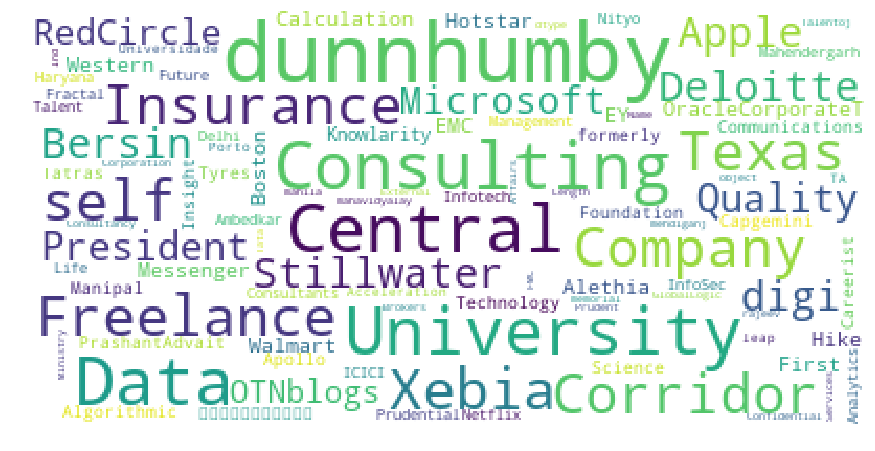

In [108]:
fig1 = plt.figure(1)
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()
fig1.savefig("word1.png", dpi=900)

### wordcloud2

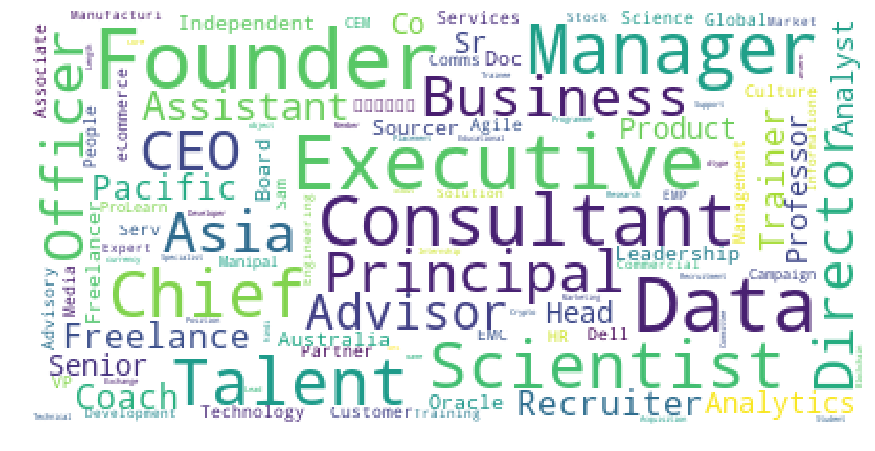

In [109]:
fig2 = plt.figure(2)
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()
fig2.savefig("word2.png", dpi=900)